In [1]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
mpl.rcParams['figure.figsize'] = (12,10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
file = tf.keras.utils
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
raw_df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V26', 'V27', 'V28', 'Amount', 'Class']].describe()

,Time,V1,V2,V3,V4,V5,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
neg, pos = np.bincount(raw_df['Class'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 284807
    Positive: 492 (0.17% of total)



In [8]:
raw_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
cleaned_df = raw_df.copy()

cleaned_df.pop('Time')

eps = 0.001
cleaned_df['Log Amount'] = np.log(cleaned_df.pop('Amount') + eps)

In [10]:
train_df, test_df = train_test_split(cleaned_df, test_size = 0.2)
train_df, val_df = train_test_split(train_df, test_size = 0.2)

train_labels = np.array(train_df.pop('Class'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Class'))
test_labels = np.array(test_df.pop('Class'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [11]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)

print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (182276,)
Validation labels shape: (45569,)
Test labels shape: (56962,)
Training features shape: (182276, 29)
validation features shape: (45569, 29)
Test features shape: (56962, 29)


c:\workspace\python\jupyterenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\workspace\python\jupyterenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


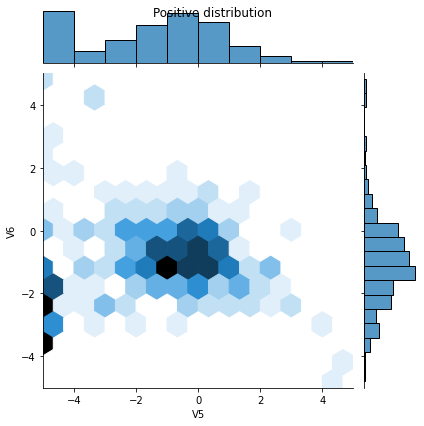

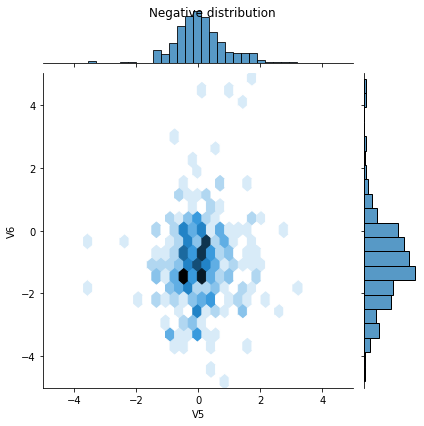

In [12]:
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)

sns.jointplot(pos_df['V5'], pos_df['V6'],
             kind='hex', xlim=(-5, 5), ylim=(-5, 5))
plt.suptitle('Positive distribution')

sns.jointplot(neg_df['V5'], pos_df['V6'],
             kind='hex', xlim=(-5, 5), ylim=(-5, 5))
_ = plt.suptitle('Negative distribution')

In [13]:
METRICS = [
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.BinaryAccuracy(name='accuracy'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
    keras.metrics.AUC(name='auc'),
]

def make_model(metrics=METRICS, output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
    model = keras.Sequential([
        keras.layers.Dense(
            16, activation='relu',
            input_shape=(train_features.shape[-1],)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation='sigmoid',
                          bias_initializer=output_bias),
    ])
    
    model.compile(optimizer=keras.optimizers.Adam(lr=1e-3),
                 loss=keras.losses.BinaryCrossentropy(),
                 metrics=metrics)
    return model

In [14]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc',
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True
)

In [15]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.predict(train_features[:10])

array([[0.53346956],
       [0.6689407 ],
       [0.5043288 ],
       [0.62160593],
       [0.36413032],
       [0.39075238],
       [0.44017   ],
       [0.3909187 ],
       [0.62283003],
       [0.4549188 ]], dtype=float32)

In [17]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print('Loss: {:0.4f}'.format(results[0]))

Loss: 0.7464


In [18]:
initial_bias = np.log([pos/neg])
initial_bias

array([-6.35935934])

In [19]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

array([[0.00204469],
       [0.00101281],
       [0.00022247],
       [0.00056468],
       [0.00047876],
       [0.00015473],
       [0.00061291],
       [0.00030609],
       [0.00018315],
       [0.00168143]], dtype=float32)

In [20]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=1)
print('Loss: {:0.4f}'.format(results[0]))

90/90 [==============================] - 1s 14ms/step - loss: 0.0143 - tp: 34.0000 - fp: 95307.0000 - tn: 268623.0000 - fn: 588.0000 - accuracy: 0.7370 - precision: 3.5661e-04 - recall: 0.0547 - auc: 0.4011
Loss: 0.0143


In [21]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weigths')
model.save_weights(initial_weights)

In [22]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(train_features,
                              train_labels,
                              batch_size=BATCH_SIZE,
                              epochs=20,
                              validation_data=(val_features, val_labels),
                              verbose=0)

In [23]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(train_features,
                                 train_labels,
                                 batch_size = BATCH_SIZE,
                                 epochs=20,
                                 validation_data=(val_features, val_labels),
                                 verbose=0)

In [24]:
def plot_loss(history, label, n):
    plt.semilogy(history.epoch, history.history['loss'],
                 color=colors[n], label='Train '+label)
    plt.semilogy(history.epoch, history.history['val_loss'],
                 color=colors[n], label='Val '+label,
                 linestyle="--")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    
    plt.legend()

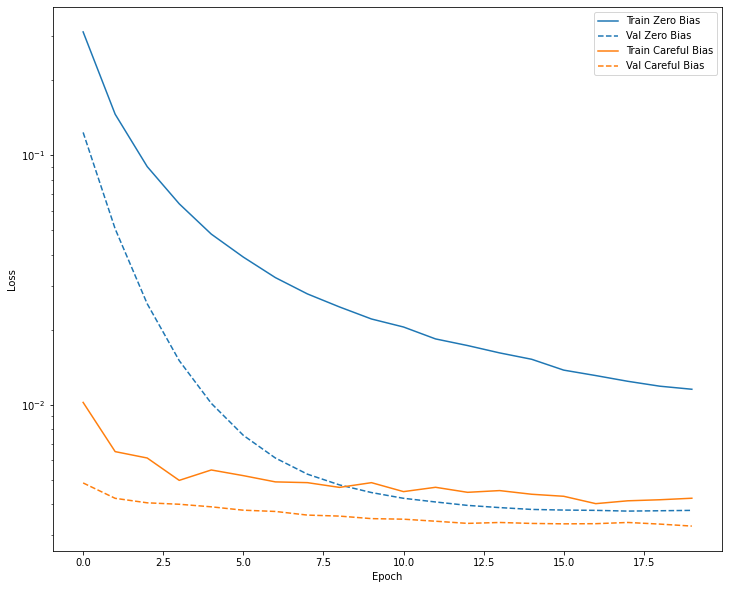

In [25]:
plot_loss(zero_bias_history, 'Zero Bias', 0)
plot_loss(careful_bias_history, 'Careful Bias', 1)

In [26]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(train_features,
                             train_labels,
                            batch_size=BATCH_SIZE,
                            epochs=EPOCHS,
                            callbacks=[early_stopping],
                            validation_data=(val_features, val_labels))

Epoch 1/100
90/90 [==============================] - 3s 34ms/step - loss: 0.0103 - tp: 86.0000 - fp: 14.0000 - tn: 227446.0000 - fn: 299.0000 - accuracy: 0.9986 - precision: 0.8600 - recall: 0.2234 - auc: 0.7643 - val_loss: 0.0052 - val_tp: 18.0000 - val_fp: 5.0000 - val_tn: 45490.0000 - val_fn: 56.0000 - val_accuracy: 0.9987 - val_precision: 0.7826 - val_recall: 0.2432 - val_auc: 0.9052
Epoch 2/100
90/90 [==============================] - 2s 18ms/step - loss: 0.0068 - tp: 103.0000 - fp: 24.0000 - tn: 181941.0000 - fn: 208.0000 - accuracy: 0.9987 - precision: 0.8110 - recall: 0.3312 - auc: 0.8546 - val_loss: 0.0043 - val_tp: 43.0000 - val_fp: 9.0000 - val_tn: 45486.0000 - val_fn: 31.0000 - val_accuracy: 0.9991 - val_precision: 0.8269 - val_recall: 0.5811 - val_auc: 0.9052
Epoch 3/100
90/90 [==============================] - 2s 19ms/step - loss: 0.0056 - tp: 161.0000 - fp: 22.0000 - tn: 181943.0000 - fn: 150.0000 - accuracy: 0.9991 - precision: 0.8798 - recall: 0.5177 - auc: 0.8892 - va

In [27]:
def plot_metrics(history):
    metrics = ['loss', 'auc', 'precision', 'recall']
    for n, metric in enumerate(metrics):
        name=metric.replace("_", " ").capitalize()
        plt.subplot(2, 2, n+1)
        plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
                color=colors[0], linestyle="--", label='val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metric=='auc':
            plt.ylim([0.8, 1])
        else:
            plt.ylim([0,1])
            
        plt.legend()

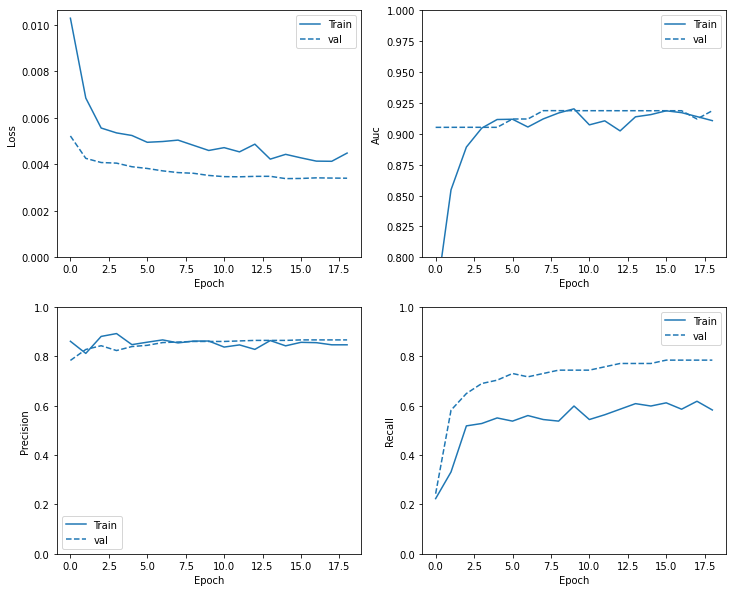

In [28]:
plot_metrics(baseline_history)

In [29]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

In [30]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
    print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
    print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
    print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
    print('Total Fraudulent Transactions: ', np.sum(cm[1]))

loss : 0.003985140006989241
tp : 72.0
fp : 13.0
tn : 56842.0
fn : 35.0
accuracy : 0.9991573095321655
precision : 0.8470588326454163
recall : 0.672897219657898
auc : 0.9203237295150757

Legitimate Transactions Detected (True Negatives):  56842
Legitimate Transactions Incorrectly Detected (False Positives):  13
Fraudulent Transactions Missed (False Negatives):  35
Fraudulent Transactions Detected (True Positives):  72
Total Fraudulent Transactions:  107


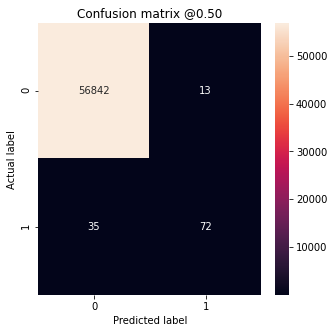

In [33]:
baseline_results = model.evaluate(test_features, test_labels,
                                 batch_size = BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
    print(name, ':', value)
print()

plot_cm(test_labels, test_predictions_baseline)

In [34]:
def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)
    
    plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positive [%]')
    plt.ylabel('True positive [%]')
    plt.xlim([-0.5, 20])
    plt.ylim([80, 100.5])
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

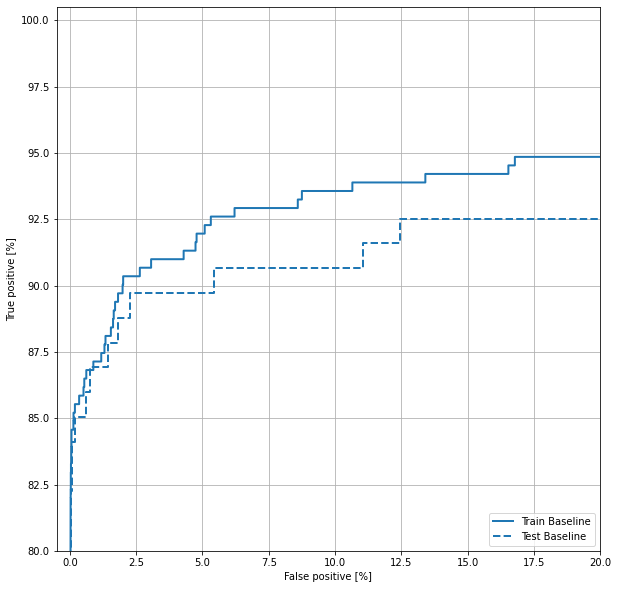

In [35]:
plot_roc('Train Baseline', train_labels, train_predictions_baseline, color=colors[0])
plot_roc('Test Baseline', test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [36]:
weight_for_0 = (1/neg)*(total)/2.0
weight_for_1 = (1/pos)*(total)/2.0

class_weight = {0:weight_for_0, 1:weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.50
Weight for class 1: 289.44


In [42]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    callbacks=[early_stopping],
    validation_data = (val_features, val_labels),
    #class weight!
    class_weight=class_weight
)

Epoch 1/100
90/90 [==============================] - 3s 37ms/step - loss: 2.4892 - tp: 96.0000 - fp: 19.0000 - tn: 238801.0000 - fn: 322.0000 - accuracy: 0.9986 - precision: 0.8348 - recall: 0.2297 - auc: 0.7829 - val_loss: 0.0053 - val_tp: 25.0000 - val_fp: 7.0000 - val_tn: 45488.0000 - val_fn: 49.0000 - val_accuracy: 0.9988 - val_precision: 0.7812 - val_recall: 0.3378 - val_auc: 0.9034
Epoch 2/100
90/90 [==============================] - 2s 18ms/step - loss: 1.1664 - tp: 147.0000 - fp: 58.0000 - tn: 181907.0000 - fn: 164.0000 - accuracy: 0.9988 - precision: 0.7171 - recall: 0.4727 - auc: 0.8753 - val_loss: 0.0056 - val_tp: 56.0000 - val_fp: 11.0000 - val_tn: 45484.0000 - val_fn: 18.0000 - val_accuracy: 0.9994 - val_precision: 0.8358 - val_recall: 0.7568 - val_auc: 0.9244
Epoch 3/100
90/90 [==============================] - 2s 17ms/step - loss: 0.9266 - tp: 180.0000 - fp: 111.0000 - tn: 181854.0000 - fn: 131.0000 - accuracy: 0.9987 - precision: 0.6186 - recall: 0.5788 - auc: 0.8953 - 

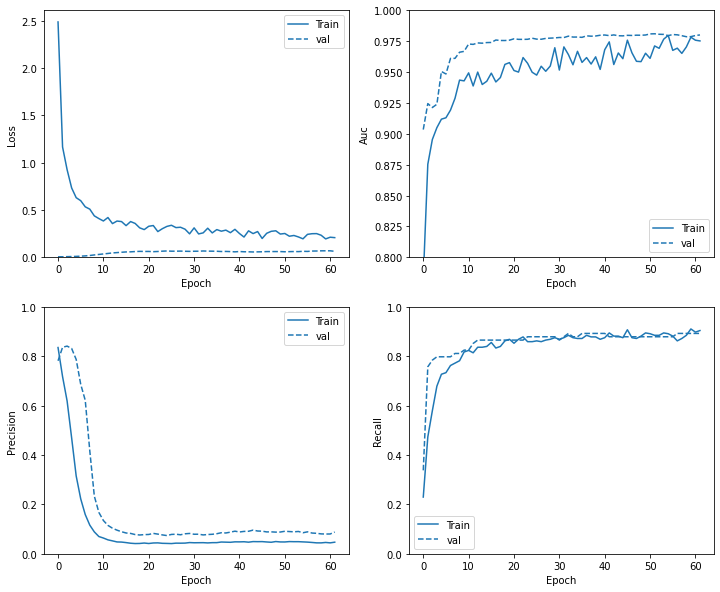

In [43]:
plot_metrics(weighted_history)

In [44]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

loss : 0.05808363854885101
tp : 96.0
fp : 774.0
tn : 56081.0
fn : 11.0
accuracy : 0.9862188696861267
precision : 0.11034482717514038
recall : 0.8971962332725525
auc : 0.9779536128044128

Legitimate Transactions Detected (True Negatives):  56081
Legitimate Transactions Incorrectly Detected (False Positives):  774
Fraudulent Transactions Missed (False Negatives):  11
Fraudulent Transactions Detected (True Positives):  96
Total Fraudulent Transactions:  107


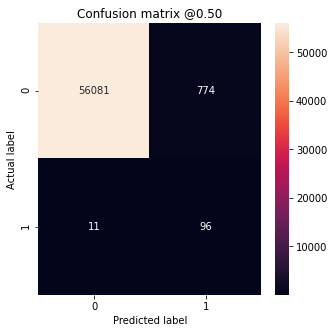

In [45]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                          batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
    print(name,':', value)
print()

plot_cm(test_labels, test_predictions_weighted)

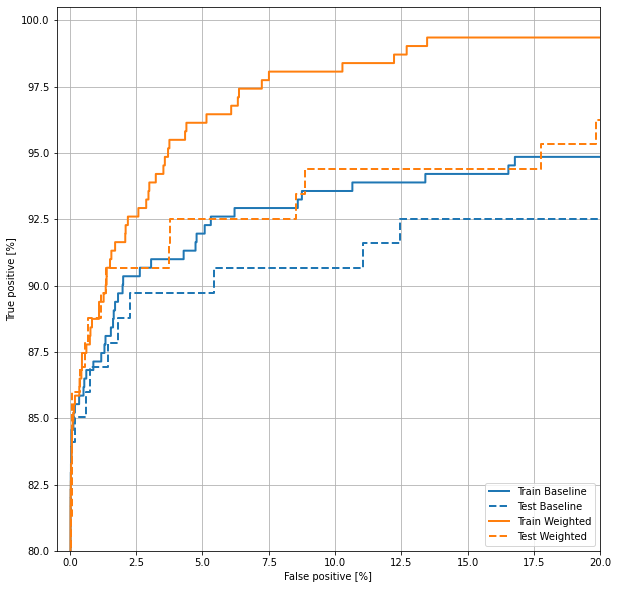

In [47]:
plot_roc('Train Baseline', train_labels, train_predictions_baseline, color=colors[0])
plot_roc('Test Baseline', test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc('Train Weighted', train_labels, train_predictions_weighted, color=colors[1])
plot_roc('Test Weighted', test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plt.legend(loc='lower right')

In [48]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [49]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = pos_features[choices]
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(181965, 29)

In [53]:
BUFFER_SIZE=100000

def make_ds(features,labels):
    ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
    ds = ds.shuffle(BUFFER_SIZE).repeat()
    return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [54]:
for features, label in pos_ds.take(1):
    print('Features:\n', features.numpy())
    print()
    print('Label: ', label.numpy())

Features:
 [-1.70221208  1.75214982 -3.72800927  2.75333027 -1.31481302 -1.34461915
 -4.3928336   2.01539832 -2.59325419 -5.          4.14216354 -5.
  0.0253068  -5.         -0.33026415 -5.         -5.         -2.97117297
  2.89656929  0.73516255  1.19596188 -0.14090854 -0.95466854 -1.22405404
  0.18312902 -0.28160696  3.0296795   0.29375963 -1.452075  ]

Label:  1


In [55]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [56]:
for features, label in resampled_ds.take(1):
    print(label.numpy().mean())

0.494140625


In [60]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

278.0

In [62]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

output_layer = resampled_model.layers[-1]
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2)

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch = resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds
)

Epoch 1/100
278/278 [==============================] - 11s 41ms/step - loss: 0.3709 - tp: 226812.0000 - fp: 37686.0000 - tn: 303932.0000 - fn: 57876.0000 - accuracy: 0.8474 - precision: 0.8575 - recall: 0.7967 - auc: 0.9195 - val_loss: 0.1449 - val_tp: 65.0000 - val_fp: 898.0000 - val_tn: 44597.0000 - val_fn: 9.0000 - val_accuracy: 0.9801 - val_precision: 0.0675 - val_recall: 0.8784 - val_auc: 0.9628
Epoch 2/100
278/278 [==============================] - 10s 35ms/step - loss: 0.1943 - tp: 249240.0000 - fp: 14384.0000 - tn: 270474.0000 - fn: 35246.0000 - accuracy: 0.9128 - precision: 0.9454 - recall: 0.8761 - auc: 0.9757 - val_loss: 0.0946 - val_tp: 65.0000 - val_fp: 946.0000 - val_tn: 44549.0000 - val_fn: 9.0000 - val_accuracy: 0.9790 - val_precision: 0.0643 - val_recall: 0.8784 - val_auc: 0.9667
Epoch 3/100
278/278 [==============================] - 10s 36ms/step - loss: 0.1536 - tp: 257158.0000 - fp: 11820.0000 - tn: 273110.0000 - fn: 27256.0000 - accuracy: 0.9314 - precision: 0.9561

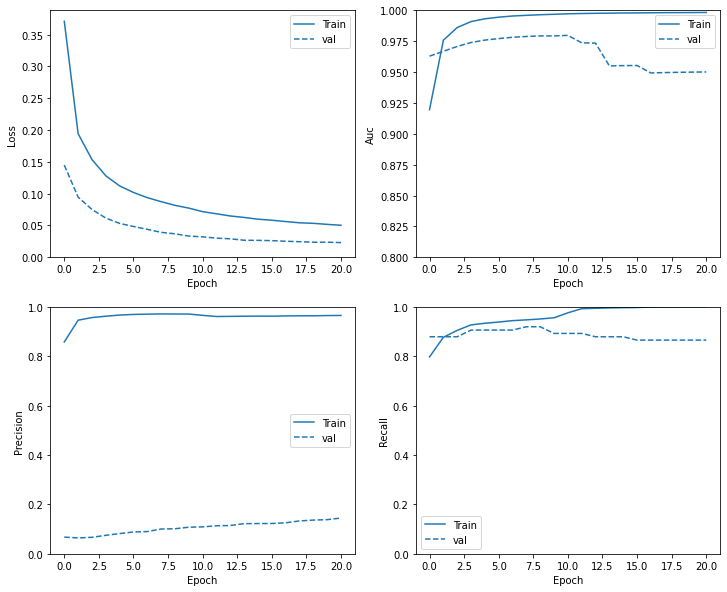

In [63]:
plot_metrics(resampled_history)

In [64]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

output_layer = resampled_model.layers[-1]
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    steps_per_epoch=20,
    epochs = 10*EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds)
)

Epoch 1/1000
20/20 [==============================] - 2s 115ms/step - loss: 0.9328 - tp: 8813.0000 - fp: 4918.0000 - tn: 60970.0000 - fn: 11828.0000 - accuracy: 0.8065 - precision: 0.6418 - recall: 0.4270 - auc: 0.8518 - val_loss: 0.4208 - val_tp: 58.0000 - val_fp: 5005.0000 - val_tn: 40490.0000 - val_fn: 16.0000 - val_accuracy: 0.8898 - val_precision: 0.0115 - val_recall: 0.7838 - val_auc: 0.9023
Epoch 2/1000
20/20 [==============================] - 1s 49ms/step - loss: 0.5550 - tp: 14371.0000 - fp: 4780.0000 - tn: 15535.0000 - fn: 6274.0000 - accuracy: 0.7301 - precision: 0.7504 - recall: 0.6961 - auc: 0.7927 - val_loss: 0.4111 - val_tp: 63.0000 - val_fp: 4754.0000 - val_tn: 40741.0000 - val_fn: 11.0000 - val_accuracy: 0.8954 - val_precision: 0.0131 - val_recall: 0.8514 - val_auc: 0.9233
Epoch 3/1000
20/20 [==============================] - 1s 47ms/step - loss: 0.4492 - tp: 15981.0000 - fp: 4467.0000 - tn: 16210.0000 - fn: 4302.0000 - accuracy: 0.7859 - precision: 0.7815 - recall: 0.

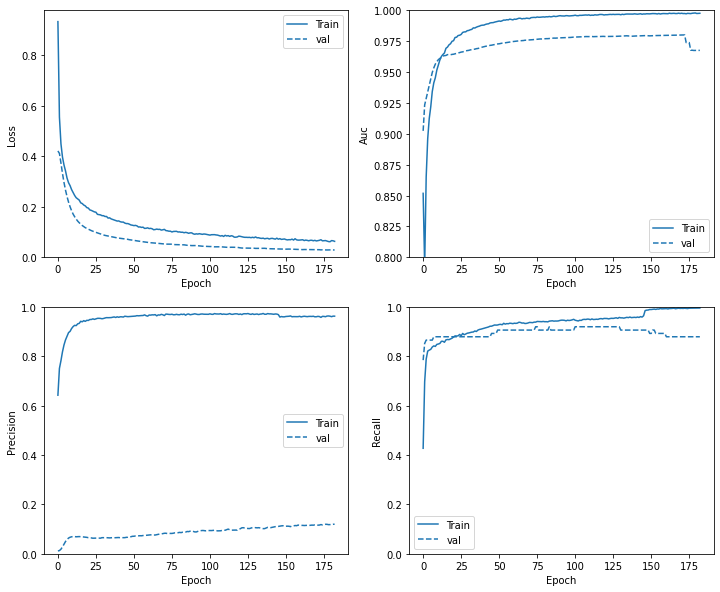

In [65]:
plot_metrics(resampled_history)

In [66]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.02944399043917656
tp :  95.0
fp :  610.0
tn :  56245.0
fn :  12.0
accuracy :  0.9890804290771484
precision :  0.13475176692008972
recall :  0.8878504633903503
auc :  0.9576030373573303

Legitimate Transactions Detected (True Negatives):  56245
Legitimate Transactions Incorrectly Detected (False Positives):  610
Fraudulent Transactions Missed (False Negatives):  12
Fraudulent Transactions Detected (True Positives):  95
Total Fraudulent Transactions:  107


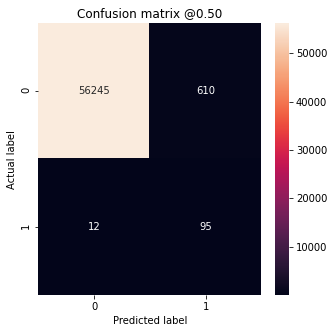

In [67]:
resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled)

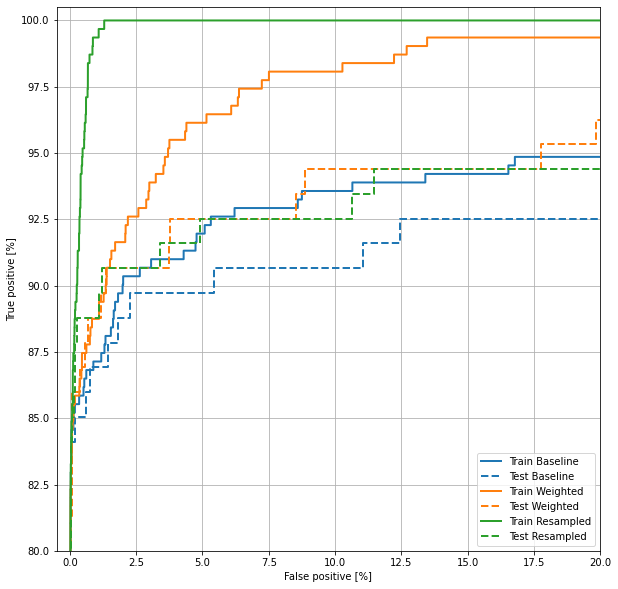

In [68]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')